## Ερώτηση 3
Ευάγγελος Τζώρτζης 

ΑΜ: 3088

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import time

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Βήμα 1

In [2]:
G3 = nx.read_edgelist('exercise3-files\edges.txt')

In [3]:
#print(G3.edges())

In [4]:
df = nx.to_pandas_edgelist(G3)
df

,source,target
0,1,517
1,1,907
2,1,19
3,1,21
4,1,1176
...,...,...
16711,696,954
16712,925,712
16713,998,822
16714,752,844


In [5]:
df_out_degree_above_10 = df.groupby('source').filter(lambda x: x.size > 10)
df_out_degree_above_10['source'].unique().shape[0] # number of vertices with out degree > 10

420

In [6]:
n = 100  # for 100 random indices
index = np.random.choice(df_out_degree_above_10['source'].unique().shape[0], n, replace=False)
index

array([103, 344, 195, 162, 385,  70,  55,  30, 122, 339, 208, 238, 281,
       386, 389, 152, 376, 337,  48, 392, 108, 112, 363, 378, 174,  88,
       364, 267,  90, 296, 194, 368,  97, 279, 258, 132, 205,  43, 322,
       190, 145, 164, 215, 349, 256, 414, 116, 330,  73, 223,  83, 315,
       277, 219, 289, 327,  14,  46, 303, 160, 353, 197, 176, 280, 228,
        56,  49, 411, 104, 200, 331,  23, 139,  39, 288,   3, 321, 269,
       147, 311,  86, 412, 366, 307, 373,  60, 404,  94, 265, 334, 245,
         7, 413,  64, 204, 323, 193, 359, 102, 169])

In [7]:
v_rand = df_out_degree_above_10['source'].unique()[index]

In [8]:
v_rand

array(['177', '836', '139', '473', '891', '37', '351', '513', '123',
       '1016', '536', '115', '1215', '677', '1096', '869', '623', '615',
       '190', '682', '457', '591', '589', '729', '1107', '418', '855',
       '598', '237', '1007', '1126', '875', '524', '669', '672', '49',
       '438', '305', '1162', '478', '346', '496', '289', '923', '910',
       '614', '362', '987', '182', '86', '170', '968', '1170', '292',
       '901', '794', '72', '442', '776', '54', '837', '225', '380',
       '1197', '821', '486', '447', '1142', '566', '800', '944', '376',
       '245', '165', '884', '19', '1154', '602', '101', '750', '8', '789',
       '771', '851', '833', '126', '1153', '81', '1029', '628', '673',
       '286', '1048', '358', '422', '1163', '99', '651', '304', '453'],
      dtype=object)

In [9]:
s_100 = df_out_degree_above_10.loc[df_out_degree_above_10['source'].isin(v_rand)].copy()

In [10]:
s_100['source'].unique().shape

(100,)

In [11]:
# 100 random vertices with out degree > 10
s_100

,source,target
199,19,384
200,19,524
201,19,526
202,19,399
203,19,534
...,...,...
16546,614,1194
16547,614,826
16548,614,1149
16549,614,992


In [12]:
# remove a random target vertex for each source vertex in s_100
s_100.groupby('source').sample(n=1).index # one random sample for each unique source

Int64Index([14103,  8979, 15117, 13184, 16534, 16182,  9933, 10902, 16522,
            12073, 16420, 14618, 14629, 14634, 13569, 13687, 13700,  7588,
             4549, 10965,  3298,  5895,  6763,  5474,   221,  3760, 11002,
             6243,  8479,   371, 11451, 11513,  6717,  3521,  8877,  4237,
             4887,  7342,  5314,  1932,  9961,  6189, 11171, 11217,  3639,
             3817,  9825,  7098,  9716, 10811,  4252,  8122,  9745,  2649,
             6549, 11251,  9682,  6899, 15617,  7227, 13232, 13333, 16550,
            15044, 15964, 14909, 15550, 13647, 12960, 12280, 16136, 16222,
              862, 15998, 14445, 15656, 14316, 16528, 14677,  6046, 11100,
             6487, 11941, 15905, 15251, 15409, 14368, 15636, 11672,  9487,
            15697, 13905, 16126, 13944, 12681, 15339, 14778, 14524, 14752,
            10895],
           dtype='int64')

In [13]:
final_graph = df.drop(index=s_100.groupby('source').sample(n=1).index) # removed 100 edges
final_graph.reset_index(inplace=True,drop=True)
final_graph

,source,target
0,1,517
1,1,907
2,1,19
3,1,21
4,1,1176
...,...,...
16611,696,954
16612,925,712
16613,998,822
16614,752,844


### Βήμα 2

In [2]:
G = nx.read_edgelist('exercise3-files\graph.txt')
S_removed = nx.read_edgelist('exercise3-files\sample.txt')

In [3]:
S_removed.edges()

EdgeView([('309', '497'), ('953', '1048'), ('1007', '1096'), ('187', '225'), ('619', '1000'), ('619', '109'), ('603', '922'), ('500', '553'), ('553', '96'), ('171', '797'), ('592', '1068'), ('885', '1059'), ('1059', '673'), ('1059', '670'), ('283', '383'), ('353', '431'), ('93', '147'), ('999', '1030'), ('999', '989'), ('1030', '1115'), ('1030', '201'), ('443', '517'), ('392', '462'), ('13', '109'), ('16', '453'), ('453', '582'), ('659', '1011'), ('402', '535'), ('535', '349'), ('729', '993'), ('729', '711'), ('707', '799'), ('850', '923'), ('380', '446'), ('446', '19'), ('141', '514'), ('930', '1213'), ('637', '748'), ('377', '478'), ('301', '412'), ('412', '451'), ('460', '536'), ('628', '996'), ('688', '864'), ('1128', '1133'), ('28', '564'), ('824', '838'), ('198', '399'), ('623', '826'), ('821', '1010'), ('846', '890'), ('37', '307'), ('307', '447'), ('1075', '1079'), ('1079', '875'), ('739', '1199'), ('166', '506'), ('405', '576'), ('308', '957'), ('806', '820'), ('749', '853'), 

In [4]:
# nx.draw_networkx(G) # /!\ does not work , some problem with the version of decorator, NetworkXError: random_state_index is incorrect

In [5]:
# directed graph
# pos=nx.spring_layout(G) # /!\ does not work , some problem with the version of decorator, NetworkXError: random_state_index is incorrect
# nx.draw_networkx(G,pos)

In [6]:
for n in G.neighbors('1'):
    print(n)

517
907
19
21
1176
155
286
389
48
57
445
192
450
72
203
204
340
97
1006
497
498
500
376
253
127


In [7]:
print(len(nx.pagerank(G,alpha=0.5,personalization={'309':1})))
#print(nx.pagerank(G,alpha=0.5,personalization={'1':1}))


1222


In [8]:
#list(G.neighbors('309'))

In [10]:
all_pagerank_309 = nx.pagerank(G,alpha=0.5,personalization={'309':1})
#print({k:all_pagerank_1[k] for k in all_pagerank_1 if (k not in list(G.neighbors('309')) and k != '309')}) # all nodes pagerank that are not '1' neighbors or '1' itself
print(list({k:all_pagerank_309[k] for k in all_pagerank_309 if (k not in list(G.neighbors('309')) and k != '309')}.keys()).index('497')) # position of the removed node

16


In [11]:
#{k for k in G.nodes() if (k not in list(G.neighbors('309')) and k != '309')}

In [12]:
def calc_index_pos(key1,target_node,al):
    a = (1-al) # convert jump probability
    pg = nx.pagerank(G,alpha=a,personalization={key1:1}) 
    
    dict1 = {k:pg[k] for k in pg if (k not in list(G.neighbors(key1)) and k != key1)}
    #print(dict1)
    #print(sorted(dict1, key=dict1.get,reverse=True))
    #print(sorted(dict1, key=dict1.get,reverse=True).index(target_node)+1)
    return (sorted(dict1, key=dict1.get,reverse=True).index(target_node)+1) # correct index +1

In [13]:
print(calc_index_pos('309','497',0.9))

1


In [14]:
print(calc_index_pos('309','497',0.1))

1


In [346]:
# calculate the positions for all source nodes in S_removed and all alpha values
positions = []

b = time.time()

for a in [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]:
    positions.append([])
    for e in S_removed.edges():
        positions[-1].append(calc_index_pos(str(e[0]),str(e[1]),a))
    print('One iteration passed. Time so far: ',time.time()-b)
        
print('Time taken: ',time.time()-b) # ~15 minutes

In [272]:
# calculate metrics
def mr_calc_all_alpha():
    mr = []
    for a in positions:
        mr.append(sum(a)/100)
    return mr

def mrr_calc_all_alpha():
    mrr = []
    for a in positions:
        summ = 0
        for i in a:
            summ += 1/i
        mrr.append(((1/100)*summ))
    return mrr

MR:  [132.82, 119.26, 111.54, 107.01, 103.75, 101.4, 101.57, 102.73, 104.7, 105.59, 107.16, 108.62, 111.38]
MRR:  [0.09813922876403566, 0.1145105525321669, 0.11157375497196469, 0.10726570037573757, 0.10142226439839953, 0.10985816068432408, 0.10440085243447643, 0.10546820946279054, 0.1121626420330061, 0.10754600578071549, 0.1067565666742878, 0.10512906952679789, 0.1021922402276666]


Text(0.5, 1.0, 'MRR for alpha values')

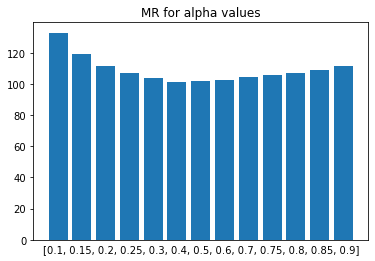

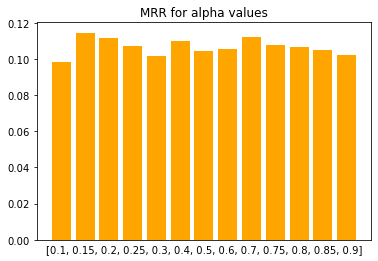

In [377]:
a = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
mr = mr_calc_all_alpha()
mrr = mrr_calc_all_alpha()
print('MR: ',mr)
print('MRR: ',mrr)
plt.bar(height=mr,x=range(len(mr)))
plt.xlabel(a)
plt.xticks([])
plt.title('MR for alpha values')
plt.figure()
plt.bar(height=mrr,x=range(len(mrr)),color='orange')
plt.xlabel(a)
plt.xticks([])
plt.title('MRR for alpha values')

Ποιοτικά η διαφορά των μετρικών είναι ότι το MR είναι το πόσο μακριά είναι το rank από το κόμβο x, ενώ το MRR μετράει το πόσο κοντά ποσοστιαία είναι η θέση από την ιδανική.

Το MR ξεκινάει ψηλά, στη συνέχεια για μεσαίες τιμές του α πέφτει και για μεγαλύτερες τιμές υπάρχει μια μικρή άνοδος. Το MMR σε αντίθεση με το προηγούμενο περιοδικά παρουσιάζει αυξομειώσεις. 

Το α όταν αυξάνει μεγαλώνει η πιθανότητα να γίνει επανεκκίνηση στον κόμβο x.

### Βήμα 3

In [19]:
S_removed.edges()

EdgeView([('309', '497'), ('953', '1048'), ('1007', '1096'), ('187', '225'), ('619', '1000'), ('619', '109'), ('603', '922'), ('500', '553'), ('553', '96'), ('171', '797'), ('592', '1068'), ('885', '1059'), ('1059', '673'), ('1059', '670'), ('283', '383'), ('353', '431'), ('93', '147'), ('999', '1030'), ('999', '989'), ('1030', '1115'), ('1030', '201'), ('443', '517'), ('392', '462'), ('13', '109'), ('16', '453'), ('453', '582'), ('659', '1011'), ('402', '535'), ('535', '349'), ('729', '993'), ('729', '711'), ('707', '799'), ('850', '923'), ('380', '446'), ('446', '19'), ('141', '514'), ('930', '1213'), ('637', '748'), ('377', '478'), ('301', '412'), ('412', '451'), ('460', '536'), ('628', '996'), ('688', '864'), ('1128', '1133'), ('28', '564'), ('824', '838'), ('198', '399'), ('623', '826'), ('821', '1010'), ('846', '890'), ('37', '307'), ('307', '447'), ('1075', '1079'), ('1079', '875'), ('739', '1199'), ('166', '506'), ('405', '576'), ('308', '957'), ('806', '820'), ('749', '853'), 

In [296]:
key1 = '309'
candidates = {k for k in G.nodes() if (k not in list(G.neighbors(key1)) and k != key1)}

In [295]:
list(candidates)[0]

'968'

In [297]:
testG = nx.to_pandas_edgelist(G)

In [298]:
testG

,source,target
0,1,517
1,1,907
2,1,19
3,1,21
4,1,1176
...,...,...
16611,599,1020
16612,1020,1020
16613,1020,1019
16614,616,641


In [299]:
testSremoved = nx.to_pandas_edgelist(S_removed)

In [300]:
testSremoved

,source,target
0,309,497
1,953,1048
2,1007,1096
3,187,225
4,619,1000
...,...,...
95,735,1197
96,607,983
97,983,745
98,635,759


In [301]:
testG[testG.source.isin(testSremoved.source)].groupby('source').get_group('309')

,source,target
11207,309,32
11208,309,357
11209,309,299
11210,309,300


In [303]:
testG[testG.source == testSremoved.source[0]] # different way

,source,target
11207,309,32
11208,309,357
11209,309,299
11210,309,300


In [304]:
testC = testG.loc[testG.source.isin(candidates)]

In [306]:
testC[(testC.target.isin(testG[testG.source == testSremoved.source[0]].target))]#.groupby('source').get_group('497').shape[0] # nodes in candidates that have common targets(out-neighbors) as 309

,source,target
173,907,357
387,389,357
653,48,32
731,445,357
1574,497,357
...,...,...
13881,132,32
14442,28,32
14942,37,32
15162,466,32


In [307]:
testC[(testC.target.isin(testG[testG.source == testSremoved.source[0]].target))].shape[0] # number of nodes in candidates that have common targets as 309

63

In [309]:
testC[(testC.target.isin(testG[testG.source == testSremoved.source[0]].target))].groupby('source').count().sort_values(by='target',ascending=False) # z sources sorted by common neighbors with x

,target
source,
497,4
412,2
535,2
301,2
305,2
100,1
514,1
445,1
446,1


In [310]:
common_n_count = testC[(testC.target.isin(testG[testG.source == testSremoved.source[0]].target))].groupby('source').count().sort_values(by='target',ascending=False).reset_index()

In [322]:
common_n_count

,source,target
1,497,4
2,412,2
3,535,2
4,301,2
5,305,2
6,100,1
7,514,1
8,445,1
9,446,1
10,449,1


In [311]:
common_n_count.index = np.arange(1, len(common_n_count) + 1) # +1 to the index
common_n_count[common_n_count.source == '497'].index[0]  # position of y in candidate nodes

1

In [312]:
pos = []
for i in testSremoved.iterrows():
    #print(i[0]) # index
    #print(i[1][0]) # source x
    #print(i[1][1]) # target y
    
    key1 = i[1][0]
    
    candidates = {k for k in G.nodes() if (k not in list(G.neighbors(key1)) and k != key1)}
    
    testC = testG.loc[testG.source.isin(candidates)]
    
    common_n = testC[(testC.target.isin(testG[testG.source == testSremoved.source[i[0]]].target))].groupby('source').count().sort_values(by='target',ascending=False).reset_index()
    
    common_n.index = np.arange(1, len(common_n) + 1) # +1 to the index
        
    if common_n[common_n.source == i[1][1]].shape[0] != 0:
        #print(common_n[common_n.source == i[1][1]].index[0])
        pos.append(common_n[common_n.source == i[1][1]].index[0])
    else:
        pos.append(0)
    

In [324]:
# calculate mr
mr = 0
for i in pos:
    mr += i
mr =  mr/100

mrr = 0
for i in pos:
    if i != 0:
        mrr += 1/i
mrr = mrr / 100

print('Coommon neighbors metrics:')
print('MR: ',mr)
print('MRR: ',mrr)


Coommon neighbors metrics:
MR:  43.49
MRR:  0.0724141241140607
